In [ ]:
#%tensorflow_version 1.x

# Steps to solve Emergency vs Non-Emergency vehicle classification problem using Batch Normalization

<ol>1. Loading the dataset</ol>
<ol>2. Pre-processing the data</ol>
<ol>3. Creating training and validation set</ol>
<ol>4. Defining the model architecture</ol>
<ol> <ol>* Adding batch normalization layer(s) </ol></ol>
<ol>5. Compiling the model</ol>
<ol>6. Training the model</ol>
<ol>7. Evaluating model performance</ol>

## 1. Loading the dataset

In [1]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module 
from keras.optimizers import Adam

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# !unzip /content/drive/My\ Drive/Dataset.zip

In [3]:
# reading the csv file
data = pd.read_csv('../data/emergency_classification.csv')

In [4]:
# create random number generator
seed = 42

In [5]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('../data/images_vehicles/' + img_name)
    # saving each image in the list
    X.append(img)
    
# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

## 2. Pre-processing the data

In [6]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2352, 150528)

In [7]:
# normalizing the pixel values
X = X / X.max()

# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

(0.0, 1.0)

## 3. Creating training and validation set

In [8]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [9]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 150528), (1646,)), ((706, 150528), (706,)))

## 4. Defining the model architecture

### <ol>Without Batch Normalization</ol>

In [10]:
# defining the model architecture
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               15052900  
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


## 5. Compiling the model

In [11]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(lr=1e-5)

In [12]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

## 6. Training the model

In [13]:
# training the model for 50 epochs

model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 [==============================] - 4s 278ms/step - loss: 0.6589 - accuracy: 0.5966 - val_loss: 0.6500 - val_accuracy: 0.5949
Epoch 2/50
13/13 [==============================] - 1s 111ms/step - loss: 0.6287 - accuracy: 0.6592 - val_loss: 0.6267 - val_accuracy: 0.6473
Epoch 3/50
13/13 [==============================] - 1s 102ms/step - loss: 0.6120 - accuracy: 0.6817 - val_loss: 0.6117 - val_accuracy: 0.6898
Epoch 4/50
13/13 [==============================] - 1s 101ms/step - loss: 0.6039 - accuracy: 0.6865 - val_loss: 0.6031 - val_accuracy: 0.6898
Epoch 5/50
13/13 [==============================] - 2s 115ms/step - loss: 0.5927 - accuracy: 0.7066 - val_loss: 0.6014 - val_accuracy: 0.6742
Epoch 6/50
13/13 [==============================] - 1s 100ms/step - loss: 0.5843 - accuracy: 0.7163 - val_loss: 0.5936 - val_accuracy: 0.6884
Epoch 7/50
13/13 [==============================] - 1s 101ms/step - loss: 0.5821 - accuracy: 0.7163 - val_loss: 0.6136 - val_accuracy: 0.6629
Epoch 

## 7. Evaluating model performance 

In [14]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]), '%')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy on validation set: 0.7181303116147308 %


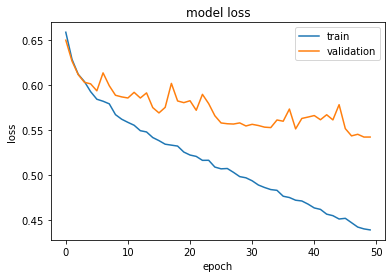

In [15]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## Defining the model architecture

### <ol>With Batch Normalization</ol>

In [16]:
# importing batch normalization layer
from keras.layers import BatchNormalization

In [17]:
# defining the model architecture and adding batch normalization layers
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 15,063,501
Trainable params: 15,063,301
Non-trainable params: 200
_________________________________________________________________


## Compiling the model

In [18]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

## Training the model

In [19]:
# training the model for 50 epochs using Batch Normalization

model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 [==============================] - 2s 121ms/step - loss: 0.6544 - accuracy: 0.6543 - val_loss: 0.8006 - val_accuracy: 0.4391
Epoch 2/50
13/13 [==============================] - 2s 175ms/step - loss: 0.5034 - accuracy: 0.7655 - val_loss: 0.7975 - val_accuracy: 0.4391
Epoch 3/50
13/13 [==============================] - 3s 193ms/step - loss: 0.4213 - accuracy: 0.8165 - val_loss: 0.7708 - val_accuracy: 0.4391
Epoch 4/50
13/13 [==============================] - 2s 192ms/step - loss: 0.3489 - accuracy: 0.8736 - val_loss: 0.7630 - val_accuracy: 0.4391
Epoch 5/50
13/13 [==============================] - 2s 187ms/step - loss: 0.2918 - accuracy: 0.8949 - val_loss: 0.7515 - val_accuracy: 0.4391
Epoch 6/50
13/13 [==============================] - 2s 191ms/step - loss: 0.2579 - accuracy: 0.9253 - val_loss: 0.7478 - val_accuracy: 0.4391
Epoch 7/50
13/13 [==============================] - 2s 180ms/step - loss: 0.2189 - accuracy: 0.9471 - val_loss: 0.7468 - val_accuracy: 0.4391
Epoch 

## Evaluating model performance

In [20]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]), '%')

Accuracy on validation set: 0.7507082152974505 %


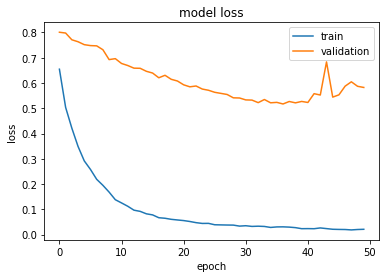

In [21]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

The convergence happened very quickly.

### Advantages:

- Speeds training by normalizing teh hidden layers.
- 